In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('news-train.csv')
test_data = pd.read_csv('news-test.csv')

In [15]:
# Shuffle data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# X/Y Split

# Training data
train_data_X = train_data['Text']
train_data_Y = train_data['Category']

# Test data
test_data_X = train_data['Text']

with open('dictionary.txt') as f:
	dic = f.read().splitlines()



## Q1A

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

cv = CountVectorizer(stop_words='english', lowercase=True,
                     analyzer='word', vocabulary=dic)
train_X = cv.fit_transform(train_data_X)
feature_names = cv.get_feature_names_out()


train_Y = LabelEncoder().fit_transform(train_data_Y)

### Q1B - Part 1

Avg Train score: 1.0 	 Avg. Validation Acc 0.923489932885906


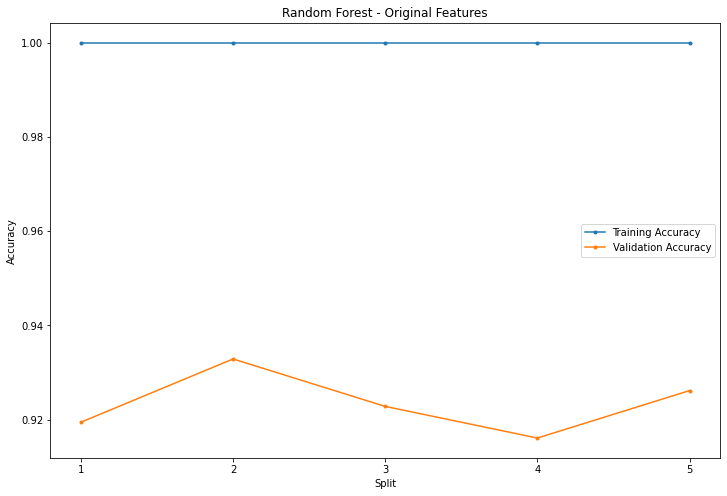

In [17]:
train_acc = []
val_acc = []
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(train_X):

    x = train_X[train, :]
    y = train_Y[train]

    x_val = train_X[test, :]
    y_val = train_Y[test]

    rfc = RandomForestClassifier(n_estimators=100,
                                 criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

    rfc.fit(x, y)
    train_acc.append(rfc.score(x, y))
    val_acc.append(rfc.score(x_val, y_val))


print(
    f'Avg Train score: {np.mean(train_acc)} \t Avg. Validation Acc {np.mean(val_acc)}')

plt.figure(figsize=(12, 8))
plt.plot(range(1, 6), train_acc, marker='.', label='Training Accuracy')
plt.plot(range(1, 6), val_acc, marker='.', label='Validation Accuracy')
plt.xlabel('Split')
plt.xticks(range(1, 6))
plt.ylabel('Accuracy')
plt.legend()
plt.title('Random Forest - Original Features')
plt.show()


#### Q1B - Part 2

In [18]:
import gensim
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

print(glove_vectors.vector_size)

train_X = cv.inverse_transform(train_X)
vocab = glove_vectors.index_to_key
def word_to_vec(data):
	embeddedVec = []
	for items in data:
		for word in items:
			if word in vocab:
				embeddedVec.append(glove_vectors.get_vector(word))
	return embeddedVec

embeddedVec = np.array(word_to_vec(train_X))


print(type(embeddedVec))


100
<class 'numpy.ndarray'>
